In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

# Define the base directory
base_dir = '/content/drive/MyDrive/content/data'

# Function to load images from directory
def load_images_from_directory(directory, target_size=(150, 150)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each sub-folder is a class
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = load_img(img_path, target_size=target_size)
                img_array = img_to_array(img) / 255.0  # Normalize
                images.append(img_array)
                labels.append(class_names.index(class_name))
    return np.array(images), np.array(labels), class_names

# Load data
x, y, class_names = load_images_from_directory(base_dir)


# Convert labels to categorical
y = to_categorical(y, num_classes=len(class_names))

# Split the data into training and testing sets (70:30 ratio) with stratification
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)





In [ ]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(279, 150, 150, 3)
(279, 4)
(649, 150, 150, 3)
(649, 4)


In [ ]:
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in training data:", class_distribution)

unique, counts = np.unique(np.argmax(y_test, axis=1), return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution in test data:", class_distribution)

Class distribution in training data: {0: 167, 1: 120, 2: 163, 3: 199}
Class distribution in test data: {0: 72, 1: 52, 2: 70, 3: 85}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=16,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.2667 - loss: 1.8390 - val_accuracy: 0.3513 - val_loss: 1.3718
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.2540 - loss: 1.3885 - val_accuracy: 0.3262 - val_loss: 1.4131
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.2879 - loss: 1.3998 - val_accuracy: 0.2509 - val_loss: 1.3799
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3164 - loss: 1.3767 - val_accuracy: 0.3047 - val_loss: 1.3753
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.2941 - loss: 1.3774 - val_accuracy: 0.3047 - val_loss: 1.3739
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3121 - loss: 1.3703 - val_accuracy: 0.2509 - val_loss: 1.4044
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.3631 - loss: 1.3271 - val_accuracy: 0.3907 - val_loss: 1.2463
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6020 - loss: 1.0274 - val_accuracy: 0.8065 - val_loss:

In [ ]:
# prompt: GIVE ME CODE TO ALSO GENERATE PICKLE FILE FOR THE ABOVE FITTED MODEL

import pickle

# Save the model to a pickle file
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step


In [ ]:
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
print(confusion_matrix(y_true_classes, y_pred_classes))

                                                                  precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.96      1.00      0.98        72
     ECG Images of Patient that have History of MI (172x12=2064)       0.66      0.71      0.69        52
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.91      0.84      0.87        70
                          Normal Person ECG Images (284x12=3408)       0.86      0.84      0.85        85

                                                        accuracy                           0.86       279
                                                       macro avg       0.85      0.85      0.85       279
                                                    weighted avg       0.86      0.86      0.86       279

[[72  0  0  0]
 [ 2 37  6  7]
 [ 1  5 59  5]
 [ 0 14  0 71]]


In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path, model, class_names):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_name = class_names[predicted_class]

    print(f'The predicted category is: {class_name}')
    return class_name

# Example usage:
predict_image('/content/drive/MyDrive/content/data/ECG Images of Patient that have History of MI (172x12=2064)/PMI(101).jpg', model, class_names)
predict_image('/content/drive/MyDrive/content/sampledata/testimg.jpg', model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
The predicted category is: ECG Images of Patient that have History of MI (172x12=2064)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The predicted category is: ECG Images of Myocardial Infarction Patients (240x12=2880)


'ECG Images of Myocardial Infarction Patients (240x12=2880)'

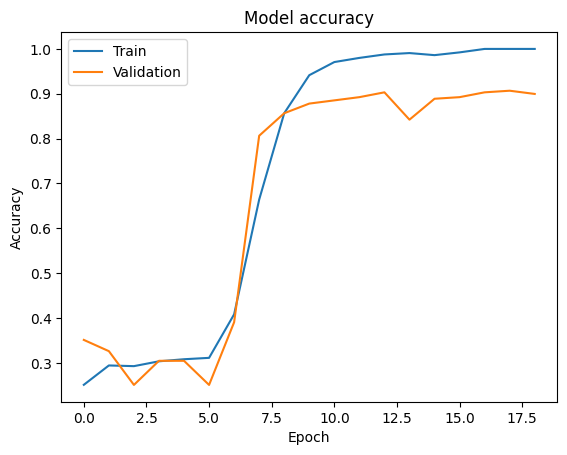

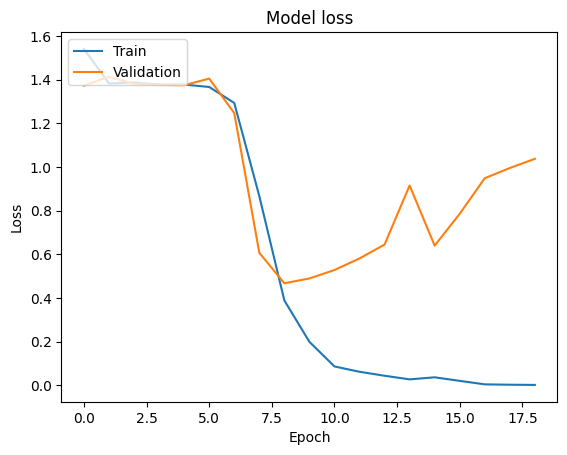

In [ ]:
# prompt: PLOT THE TRAINING ACCURACY , VALIDATION ACCURACY AGAINST EPOCS SIMILARLY PLOR LOSS,VALIDATION LOSS WITH EPOCHS

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
predict_image('/content/drive/MyDrive/content/sampledata/testimg.jpg', model, class_names)

NameError: name 'predict_image' is not defined